# **Laporan Akhir - Tugas Akhir Pemrosesan Teks**
Dosen pengampu: Ulfa Siti Nuraini, S.Stat., M.Stat.

Kelompok: 6
1. Rafi King Akbar(251155002)
2. Stella Dagatha (24031554080)
3. Gita Nurani (24031554122)


#**Scrapping and Merger Data**

In [ ]:
!pip install google_play_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google_play_scraper import reviews, Sort

apps_id = {
    "Ajaib": "ajaib.co.id",
    "IPOT": "com.indopremier.ipot",
    "Stockbit": "com.stockbit.android"
}

N = 2000

#Algoritma Scrapping
def get_reviews(app_id, app_name, n_review = N):
  result,_= reviews(
      app_id,
      lang = 'id',
      country = 'id',
      sort = Sort.NEWEST,
      count = n_review
  )
  df = pd.DataFrame(result)

  #Pemilihan kolom yang penting
  kolom = [
        "reviewId", "userName", "score", "at",
        "content", "replyContent", "thumbsUpCount", "appVersion"
  ]
  df=df[kolom]
  df["app_name"]= app_name
  return df

#Scrap Keseluruhan Aplikasi
list_df = []

for nama_app, app_id in apps_id.items():
    print(f"Sedang mengambil review: {nama_app}")
    df_app = get_reviews(app_id, nama_app)
    print(f"-> didapat {len(df_app)} baris\n")
    list_df.append(df_app)

#Merge
df_all = pd.concat(list_df, ignore_index=True)

Sedang mengambil review: Ajaib
-> didapat 2000 baris

Sedang mengambil review: IPOT
-> didapat 2000 baris

Sedang mengambil review: Stockbit
-> didapat 2000 baris



In [ ]:
#cek isi datanya per aplikasi
df_all[df_all["app_name"] == "Stockbit"]

,reviewId,userName,score,at,content,replyContent,thumbsUpCount,appVersion,app_name
4000,e816bc8d-a658-443d-8a06-13ed6ba747e1,Susi Ajah,5,2025-11-17 12:37:22,sangat membantu,"Halo kak Susi,\n\nSenang sekali baca review po...",0,3.16.0,Stockbit
4001,d919bf10-59df-4270-ac50-50df36b3927f,Luthfi Star,1,2025-11-17 11:36:28,sekuritas ga jelas mau login kembali di perang...,"Halo kak,\n\nJika sebelumnya un-install aplika...",0,3.16.0,Stockbit
4002,161a281c-70d9-4826-87eb-6b453cfdb068,Denny Silalahi,5,2025-11-17 10:44:48,"WOW Bagus Sekali versi 3.13.2 ini , banyak fit...","Halo kak Denny Silalahi,\n\nSenang sekali baca...",1,3.15.9,Stockbit
4003,ea0a1791-5179-4d34-bd8a-374ff24e4b4a,prasetyo A.R,5,2025-11-17 08:12:47,nice,"Hi,\n\nThank you so much for your review :) Yo...",0,3.9.29,Stockbit
4004,c3ac181d-8f7f-41c9-8f1b-74ba5e7d7eb4,Rendra Setyawan,2,2025-11-17 07:04:58,mau login kembali susah jika tidak sengaja ter...,"Halo kak Rendra,\n\nJika sebelumnya un-install...",2,3.16.0,Stockbit
...,...,...,...,...,...,...,...,...,...
5995,30b33e71-2946-40ec-b3f8-3d7a02d20e0a,Yonanda Agil Syaputra,5,2025-07-14 02:26:57,best,"Hi Yonanda Agil Syaputra,\n\nThanks for your f...",0,3.11.3,Stockbit
5996,9d8391f5-b254-4578-bd57-a16bdc906d84,Bhipnd2,5,2025-07-14 02:20:44,Mantep,"Halo kak Bhipnd2,\n\nKami senang sekali kakak ...",0,None,Stockbit
5997,06b59246-2f82-49b4-9b37-9162d13044a1,Titis Chanel,5,2025-07-13 21:03:00,Okey,Halo kak\n\nTerima kasih atas bintang 5 nya :)...,0,3.11.3,Stockbit
5998,a24d7c1c-4453-485a-b469-5ce27820d5f1,Nanda Suntoro,5,2025-07-13 20:49:18,mantapp,"Halo kak Nanda Suntoro,\n\nKami senang sekali ...",0,None,Stockbit


In [ ]:
#cek isi datanya semua aplikasi/merger
print("Jumlah total baris:", len(df_all))
df_all

Jumlah total baris: 6000


,reviewId,userName,score,at,content,replyContent,thumbsUpCount,appVersion,app_name
0,ec9a1174-fe90-4a28-b898-fe8d89b3e4a1,Mridho Setiawan,5,2025-11-17 14:25:05,ga ribet ga rewel apk ini toplah,None,0,2.82.1,Ajaib
1,a9fe644f-7d5e-4e4d-bb78-36aa91b9b7ac,Daniel Parulian Sihotang,1,2025-11-17 14:08:43,"Verifikasi sulit, sudah menghubungi Customer S...","Hai Kak, Mohon maaf atas ketidaknyamanannya, k...",0,None,Ajaib
2,1b16dff4-a2d7-49c7-86d3-867fa9bf40e3,RIAZLY IBNU Zakaria,5,2025-11-17 13:38:25,yok bisa yok ajaib jadi #1 sekuritas di Indonesia,None,0,2.81.0,Ajaib
3,93d1efe2-4f11-475a-8cff-b5856dcf36a0,syafa Dayana,5,2025-11-17 11:25:52,Rekomendasi Reksadana-nya sering insightful bu...,None,0,None,Ajaib
4,295642e3-f5dd-4b38-be58-9cec8955ae20,abdul aziz,3,2025-11-17 11:20:55,uang Day Trading tidak masuk,"Hai Kak, Mohon maaf atas ketidaknyamanannya. M...",0,None,Ajaib
...,...,...,...,...,...,...,...,...,...
5995,30b33e71-2946-40ec-b3f8-3d7a02d20e0a,Yonanda Agil Syaputra,5,2025-07-14 02:26:57,best,"Hi Yonanda Agil Syaputra,\n\nThanks for your f...",0,3.11.3,Stockbit
5996,9d8391f5-b254-4578-bd57-a16bdc906d84,Bhipnd2,5,2025-07-14 02:20:44,Mantep,"Halo kak Bhipnd2,\n\nKami senang sekali kakak ...",0,None,Stockbit
5997,06b59246-2f82-49b4-9b37-9162d13044a1,Titis Chanel,5,2025-07-13 21:03:00,Okey,Halo kak\n\nTerima kasih atas bintang 5 nya :)...,0,3.11.3,Stockbit
5998,a24d7c1c-4453-485a-b469-5ce27820d5f1,Nanda Suntoro,5,2025-07-13 20:49:18,mantapp,"Halo kak Nanda Suntoro,\n\nKami senang sekali ...",0,None,Stockbit


In [ ]:
#penyimpanan ke CSV
output_path = "reviews_all_sekuritas_raw.csv"
df_all.to_csv(output_path, index=False)

#**Import Data**


Scrapping dilakukan pada **18/11/2025**, dan tahap ini merupakan proses pengambilan data awal sebanyak **2000 review untuk setiap aplikasi**. Ditetapkan agar hasilnya tidak berubah-ubah

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/SentimenAnalysisRetailSecurities/refs/heads/main/data/reviews_all_sekuritas_raw.csv")
df

,reviewId,userName,score,at,content,replyContent,thumbsUpCount,appVersion,app_name
0,ec9a1174-fe90-4a28-b898-fe8d89b3e4a1,Mridho Setiawan,5,2025-11-17 14:25:05,ga ribet ga rewel apk ini toplah,NaN,0,2.82.1,Ajaib
1,a9fe644f-7d5e-4e4d-bb78-36aa91b9b7ac,Daniel Parulian Sihotang,1,2025-11-17 14:08:43,"Verifikasi sulit, sudah menghubungi Customer S...","Hai Kak, Mohon maaf atas ketidaknyamanannya, k...",0,NaN,Ajaib
2,1b16dff4-a2d7-49c7-86d3-867fa9bf40e3,RIAZLY IBNU Zakaria,5,2025-11-17 13:38:25,yok bisa yok ajaib jadi #1 sekuritas di Indonesia,NaN,0,2.81.0,Ajaib
3,93d1efe2-4f11-475a-8cff-b5856dcf36a0,syafa Dayana,5,2025-11-17 11:25:52,Rekomendasi Reksadana-nya sering insightful bu...,NaN,0,NaN,Ajaib
4,295642e3-f5dd-4b38-be58-9cec8955ae20,abdul aziz,3,2025-11-17 11:20:55,uang Day Trading tidak masuk,"Hai Kak, Mohon maaf atas ketidaknyamanannya. M...",0,NaN,Ajaib
...,...,...,...,...,...,...,...,...,...
5995,30b33e71-2946-40ec-b3f8-3d7a02d20e0a,Yonanda Agil Syaputra,5,2025-07-14 02:26:57,best,"Hi Yonanda Agil Syaputra,\n\nThanks for your f...",0,3.11.3,Stockbit
5996,9d8391f5-b254-4578-bd57-a16bdc906d84,Bhipnd2,5,2025-07-14 02:20:44,Mantep,"Halo kak Bhipnd2,\n\nKami senang sekali kakak ...",0,NaN,Stockbit
5997,06b59246-2f82-49b4-9b37-9162d13044a1,Titis Chanel,5,2025-07-13 21:03:00,Okey,Halo kak\n\nTerima kasih atas bintang 5 nya :)...,0,3.11.3,Stockbit
5998,a24d7c1c-4453-485a-b469-5ce27820d5f1,Nanda Suntoro,5,2025-07-13 20:49:18,mantapp,"Halo kak Nanda Suntoro,\n\nKami senang sekali ...",0,NaN,Stockbit


#**Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       6000 non-null   object
 1   userName       6000 non-null   object
 2   score          6000 non-null   int64 
 3   at             6000 non-null   object
 4   content        6000 non-null   object
 5   replyContent   4286 non-null   object
 6   thumbsUpCount  6000 non-null   int64 
 7   appVersion     4718 non-null   object
 8   app_name       6000 non-null   object
dtypes: int64(2), object(7)
memory usage: 422.0+ KB


###1.Lower Casing


In [ ]:
pre1 = []

for i in df['content']:
  hasil_lc = str.lower(i)
  pre1.append(hasil_lc)

beforeafter = pd.DataFrame({'app_name':df['app_name'],'Sebelum Preprocessing': df['content'], 'Setelah Lower Casing ': pre1})
beforeafter

,app_name,Sebelum Preprocessing,Setelah Lower Casing
0,Ajaib,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah
1,Ajaib,"Verifikasi sulit, sudah menghubungi Customer S...","verifikasi sulit, sudah menghubungi customer s..."
2,Ajaib,yok bisa yok ajaib jadi #1 sekuritas di Indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia
3,Ajaib,Rekomendasi Reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...
4,Ajaib,uang Day Trading tidak masuk,uang day trading tidak masuk
...,...,...,...
5995,Stockbit,best,best
5996,Stockbit,Mantep,mantep
5997,Stockbit,Okey,okey
5998,Stockbit,mantapp,mantapp


###2.Removal HTML tags

In [ ]:
import re
def remove_html(text):
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

pre2 = []
for i in beforeafter['Setelah Lower Casing ']:
  hasil_rht = remove_html(i)
  pre2.append(hasil_rht)

beforeafter ['Setelah Remove HTML Tags'] = pre2
beforeafter

,app_name,Sebelum Preprocessing,Setelah Lower Casing,Setelah Remove HTML Tags
0,Ajaib,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah
1,Ajaib,"Verifikasi sulit, sudah menghubungi Customer S...","verifikasi sulit, sudah menghubungi customer s...","verifikasi sulit, sudah menghubungi customer s..."
2,Ajaib,yok bisa yok ajaib jadi #1 sekuritas di Indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia
3,Ajaib,Rekomendasi Reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...
4,Ajaib,uang Day Trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk
...,...,...,...,...
5995,Stockbit,best,best,best
5996,Stockbit,Mantep,mantep,mantep
5997,Stockbit,Okey,okey,okey
5998,Stockbit,mantapp,mantapp,mantapp


###3.Remove Punctuation

In [ ]:
import string
punc = string.punctuation

def remove_punctuation(text):
  return text.translate(str.maketrans('','',punc))

pre3=[]
for i in beforeafter['Setelah Remove HTML Tags']:
  hasil_rp = remove_punctuation(i)
  pre3.append(hasil_rp)

beforeafter['Setelah Remove Punctuation'] = pre3
beforeafter

,app_name,Sebelum Preprocessing,Setelah Lower Casing,Setelah Remove HTML Tags,Setelah Remove Punctuation
0,Ajaib,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah
1,Ajaib,"Verifikasi sulit, sudah menghubungi Customer S...","verifikasi sulit, sudah menghubungi customer s...","verifikasi sulit, sudah menghubungi customer s...",verifikasi sulit sudah menghubungi customer se...
2,Ajaib,yok bisa yok ajaib jadi #1 sekuritas di Indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia,yok bisa yok ajaib jadi 1 sekuritas di indonesia
3,Ajaib,Rekomendasi Reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...,rekomendasi reksadananya sering insightful bua...
4,Ajaib,uang Day Trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk
...,...,...,...,...,...
5995,Stockbit,best,best,best,best
5996,Stockbit,Mantep,mantep,mantep,mantep
5997,Stockbit,Okey,okey,okey,okey
5998,Stockbit,mantapp,mantapp,mantapp,mantapp


###4.Remove Emoji

In [ ]:
!pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
import demoji

def remove_emoji(text):
  cleaned_text = demoji.replace(text,repl='')
  return cleaned_text

pre4 = []
for i in beforeafter['Setelah Remove Punctuation']:
  hasil_re = remove_emoji(i)
  pre4.append(hasil_re)

beforeafter["Setelah Remove Emoji"] = pre4
beforeafter


,app_name,Sebelum Preprocessing,Setelah Lower Casing,Setelah Remove HTML Tags,Setelah Remove Punctuation,Setelah Remove Emoji
0,Ajaib,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah
1,Ajaib,"Verifikasi sulit, sudah menghubungi Customer S...","verifikasi sulit, sudah menghubungi customer s...","verifikasi sulit, sudah menghubungi customer s...",verifikasi sulit sudah menghubungi customer se...,verifikasi sulit sudah menghubungi customer se...
2,Ajaib,yok bisa yok ajaib jadi #1 sekuritas di Indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia,yok bisa yok ajaib jadi 1 sekuritas di indonesia,yok bisa yok ajaib jadi 1 sekuritas di indonesia
3,Ajaib,Rekomendasi Reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...,rekomendasi reksadananya sering insightful bua...,rekomendasi reksadananya sering insightful bua...
4,Ajaib,uang Day Trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk
...,...,...,...,...,...,...
5995,Stockbit,best,best,best,best,best
5996,Stockbit,Mantep,mantep,mantep,mantep,mantep
5997,Stockbit,Okey,okey,okey,okey,okey
5998,Stockbit,mantapp,mantapp,mantapp,mantapp,mantapp


###5.Normalize

a. Tokenisasi Sederhana

In [ ]:
all_words = " ".join(beforeafter['Setelah Remove Emoji']).split()

b. Melihat dan Hitung Frekuensi Kata

In [ ]:
from collections import Counter

freq = Counter(all_words)
freq.most_common(200)

[('dan', 2196),
 ('di', 1809),
 ('aplikasi', 1693),
 ('saya', 1453),
 ('saham', 1415),
 ('yang', 1367),
 ('bisa', 1204),
 ('ini', 1201),
 ('sangat', 1089),
 ('untuk', 938),
 ('ipot', 871),
 ('mudah', 870),
 ('nya', 850),
 ('investasi', 793),
 ('ajaib', 784),
 ('banget', 748),
 ('ada', 738),
 ('bagus', 715),
 ('buat', 669),
 ('juga', 649),
 ('tidak', 607),
 ('fitur', 578),
 ('mau', 553),
 ('pemula', 548),
 ('sudah', 537),
 ('dari', 480),
 ('yg', 479),
 ('hari', 477),
 ('jadi', 460),
 ('lebih', 441),
 ('lama', 430),
 ('ga', 409),
 ('lengkap', 401),
 ('lagi', 389),
 ('dengan', 388),
 ('error', 386),
 ('ke', 384),
 ('masuk', 380),
 ('gak', 379),
 ('udah', 361),
 ('beli', 352),
 ('ipo', 352),
 ('eror', 350),
 ('membantu', 339),
 ('banyak', 335),
 ('cepat', 327),
 ('terus', 319),
 ('dana', 319),
 ('aja', 319),
 ('tapi', 316),
 ('cocok', 305),
 ('rdn', 298),
 ('tolong', 286),
 ('mantap', 277),
 ('sering', 275),
 ('trading', 275),
 ('baru', 272),
 ('transaksi', 272),
 ('aku', 271),
 ('aplikasi

c. Algoritma Normalize

In [ ]:
norm = {
    "yg": "yang",
    "gk": "tidak",
    "ga": "tidak",
    "gak": "tidak",
    "nggak": "tidak",
    "bgt": "banget",
    "aja": "saja",
    "kalo": "kalau",
    "udah": "sudah",
    "udh": "sudah"
}

def normalisasi(text):
  words = text.split()
  hasil = []

  for w in words:
    if w in norm:
      hasil.append(norm[w])
    else:
      hasil.append(w)
  return " ".join(hasil)

pre5 = []
for i in beforeafter['Setelah Remove Emoji']:
  hasil_norm = normalisasi(i)
  pre5.append(hasil_norm)

beforeafter['Setelah Normalize'] = pre5
beforeafter


,app_name,Sebelum Preprocessing,Setelah Lower Casing,Setelah Remove HTML Tags,Setelah Remove Punctuation,Setelah Remove Emoji,Setelah Normalize
0,Ajaib,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,ga ribet ga rewel apk ini toplah,tidak ribet tidak rewel apk ini toplah
1,Ajaib,"Verifikasi sulit, sudah menghubungi Customer S...","verifikasi sulit, sudah menghubungi customer s...","verifikasi sulit, sudah menghubungi customer s...",verifikasi sulit sudah menghubungi customer se...,verifikasi sulit sudah menghubungi customer se...,verifikasi sulit sudah menghubungi customer se...
2,Ajaib,yok bisa yok ajaib jadi #1 sekuritas di Indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia,yok bisa yok ajaib jadi #1 sekuritas di indonesia,yok bisa yok ajaib jadi 1 sekuritas di indonesia,yok bisa yok ajaib jadi 1 sekuritas di indonesia,yok bisa yok ajaib jadi 1 sekuritas di indonesia
3,Ajaib,Rekomendasi Reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...,rekomendasi reksadana-nya sering insightful bu...,rekomendasi reksadananya sering insightful bua...,rekomendasi reksadananya sering insightful bua...,rekomendasi reksadananya sering insightful bua...
4,Ajaib,uang Day Trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk,uang day trading tidak masuk
...,...,...,...,...,...,...,...
5995,Stockbit,best,best,best,best,best,best
5996,Stockbit,Mantep,mantep,mantep,mantep,mantep,mantep
5997,Stockbit,Okey,okey,okey,okey,okey,okey
5998,Stockbit,mantapp,mantapp,mantapp,mantapp,mantapp,mantapp


#**Klasifikasi Sentimen (Indo RoBERTa)**

###1.Simpan Data Preprocessing Terakhir

a. Masukan ke CSV

In [ ]:
df_norm = beforeafter[["app_name","Setelah Normalize"]]
df_norm

,app_name,Setelah Normalize
0,Ajaib,tidak ribet tidak rewel apk ini toplah
1,Ajaib,verifikasi sulit sudah menghubungi customer se...
2,Ajaib,yok bisa yok ajaib jadi 1 sekuritas di indonesia
3,Ajaib,rekomendasi reksadananya sering insightful bua...
4,Ajaib,uang day trading tidak masuk
...,...,...
5995,Stockbit,best
5996,Stockbit,mantep
5997,Stockbit,okey
5998,Stockbit,mantapp


In [ ]:
df_norm.to_csv("reviews_data_normalized.csv", index=False)

b. Baca Data

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/SentimenAnalysisRetailSecurities/refs/heads/main/data/reviews_data_normalized.csv")
df.head()

,app_name,Setelah Normalize
0,Ajaib,tidak ribet tidak rewel apk ini toplah
1,Ajaib,verifikasi sulit sudah menghubungi customer se...
2,Ajaib,yok bisa yok ajaib jadi 1 sekuritas di indonesia
3,Ajaib,rekomendasi reksadananya sering insightful bua...
4,Ajaib,uang day trading tidak masuk


c. Ubah Nama Kolom

In [ ]:
df = df.rename(columns={"Setelah Normalize": "review_all"})
df.head()

,app_name,review_all
0,Ajaib,tidak ribet tidak rewel apk ini toplah
1,Ajaib,verifikasi sulit sudah menghubungi customer se...
2,Ajaib,yok bisa yok ajaib jadi 1 sekuritas di indonesia
3,Ajaib,rekomendasi reksadananya sering insightful bua...
4,Ajaib,uang day trading tidak masuk


d. Cek Baris Kosong

In [ ]:
df[df['review_all'].isna()]

,app_name,review_all
1231,Ajaib,NaN
1441,Ajaib,NaN
1718,Ajaib,NaN
1893,Ajaib,NaN
2294,IPOT,NaN
2396,IPOT,NaN
2433,IPOT,NaN
2495,IPOT,NaN
2983,IPOT,NaN
2993,IPOT,NaN


e. Drop Baris Kosong

In [ ]:
df = df.dropna(subset=['review_all'])

In [ ]:
df['review_all'].apply(type).value_counts()


,count
review_all,
<class 'str'>,5976


###2.Klasifikasi Sentimen

a. Algoritma Labelling

In [ ]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis', model='w11wo/indonesian-roberta-base-sentiment-classifier')

def prediksi_sentimen(teks):
  hasil = classifier(teks)
  return hasil[0]['label']

df['sentimen'] = df['review_all'].apply(prediksi_sentimen)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


b. Melihat Jumlah Label Sentimen

In [ ]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
positive,3020
negative,2266
neutral,690


c. simpan dalam bentuk CSV

In [ ]:
df.to_csv("reviews_data_SentimenLabelling.csv", index=False)

#**Evaluasi Auto Labelling**

###1.Baca Data

In [ ]:
import pandas as pd

df_sl=pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/SentimenAnalysisRetailSecurities/refs/heads/main/data/reviews_data_SentimenLabelling.csv")
df_sl.head()

,app_name,review_all,sentimen
0,Ajaib,tidak ribet tidak rewel apk ini toplah,positive
1,Ajaib,verifikasi sulit sudah menghubungi customer se...,negative
2,Ajaib,yok bisa yok ajaib jadi 1 sekuritas di indonesia,neutral
3,Ajaib,rekomendasi reksadananya sering insightful bua...,positive
4,Ajaib,uang day trading tidak masuk,negative


###2.Ambil 300 Data Random

In [ ]:
df_eval = df_sl.sample(300, random_state=42).copy()
df_eval["label_manual"]=""
df_eval.to_csv("evaluasi_300_data.csv", index=False)
df_eval.head()


,app_name,review_all,sentimen,label_manual
5958,Stockbit,mau verifikasi saja sudah di persulit ya bos,negative,
4333,Stockbit,sudah 2 hari eror mulu kalau jam 9sebelum sebe...,negative,
2585,IPOT,aplikasi ini luar biasadan sangat membantu,positive,
1755,Ajaib,lumayan ngebantu sih untuk yang sedang belajar...,positive,
4773,Stockbit,sering error saat pembukan jm9,negative,


###3.Load File Yang Sudah Diisi Manual

In [ ]:
import pandas as pd

df_eval_done = pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/SentimenAnalysisRetailSecurities/refs/heads/main/data/evaluasi_300_data.csv", sep=";")
df_eval_done

,app_name,review_all,sentimen,label_manual
0,Stockbit,mau verifikasi saja sudah di persulit ya bos,negative,negative
1,Stockbit,sudah 2 hari eror mulu kalau jam 9sebelum sebe...,negative,negative
2,IPOT,aplikasi ini luar biasadan sangat membantu,positive,positive
3,Ajaib,lumayan ngebantu sih untuk yang sedang belajar...,positive,positive
4,Stockbit,sering error saat pembukan jm9,negative,negative
...,...,...,...,...
295,Ajaib,lagi dan lagi perasaan tidak mengenakkan dari ...,negative,negative
296,Stockbit,overall bagus banget,positive,positive
297,Ajaib,aplikasi ini sangat membantu proses cepat tida...,positive,positive
298,IPOT,saya kok tidak bisa login yaa tiba tiba tidak ...,neutral,negative


###4.Evaluasi Auto Labelling

a. Confusion Matrix

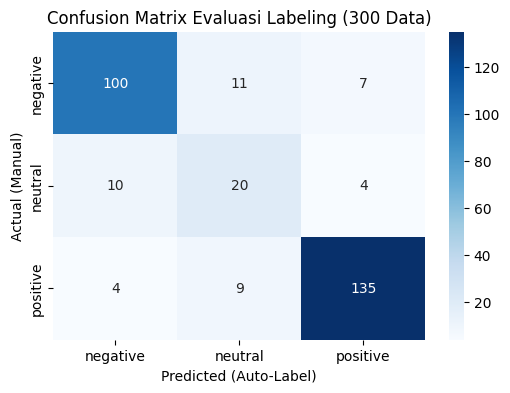

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(df_eval_done["label_manual"], df_eval_done["sentimen"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["negative","neutral","positive"],
            yticklabels=["negative","neutral","positive"],
            cmap="Blues")
plt.xlabel("Predicted (Auto-Label)")
plt.ylabel("Actual (Manual)")
plt.title("Confusion Matrix Evaluasi Labeling (300 Data)")
plt.show()

b. Ukuran Evaluasi

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(df_eval_done["label_manual"],
                                 df_eval_done["sentimen"]))

print("\nClassification Report:\n")
print(classification_report(df_eval_done["label_manual"],
                            df_eval_done["sentimen"]))


Accuracy: 0.85

Classification Report:

              precision    recall  f1-score   support

    negative       0.88      0.85      0.86       118
     neutral       0.50      0.59      0.54        34
    positive       0.92      0.91      0.92       148

    accuracy                           0.85       300
   macro avg       0.77      0.78      0.77       300
weighted avg       0.86      0.85      0.85       300



c. Melihat apa saja yang berbeda

In [ ]:
df_error = df_eval_done[df_eval_done["label_manual"] != df_eval_done["sentimen"]]
df_error


,app_name,review_all,sentimen,label_manual
6,IPOT,ngebantu banget pokoknya,negative,positive
17,Stockbit,eror dah dua hari berturut turut,neutral,negative
19,Stockbit,bagus cuma registrasi akun reel nya saja yang ...,negative,neutral
25,Ajaib,ok,negative,neutral
28,Stockbit,mantep,negative,positive
29,Ajaib,jual saham sebelum pukul 1200 sudah 2 hari dan...,neutral,negative
34,IPOT,ok baik,negative,neutral
41,IPOT,aplikasi ipot baru lengkap dengan semua fitur ...,neutral,positive
54,Stockbit,eror terus setiap open market mau tp tdnya unt...,positive,negative
67,Stockbit,virtual trading tidak bisa di buka min tulisan...,neutral,negative


#**Analisis Sentimen Global**

###1.Baca Data

In [ ]:
import pandas as pd

df_sl=pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/SentimenAnalysisRetailSecurities/refs/heads/main/data/reviews_data_SentimenLabelling.csv")
df_sl.head()

,app_name,review_all,sentimen
0,Ajaib,tidak ribet tidak rewel apk ini toplah,positive
1,Ajaib,verifikasi sulit sudah menghubungi customer se...,negative
2,Ajaib,yok bisa yok ajaib jadi 1 sekuritas di indonesia,neutral
3,Ajaib,rekomendasi reksadananya sering insightful bua...,positive
4,Ajaib,uang day trading tidak masuk,negative


###2.Visualisasi Sentimen

a. Jumlah Sentimen Keseluruhan

In [ ]:
df_sl['sentimen'].value_counts()

,count
sentimen,
positive,3020
negative,2266
neutral,690


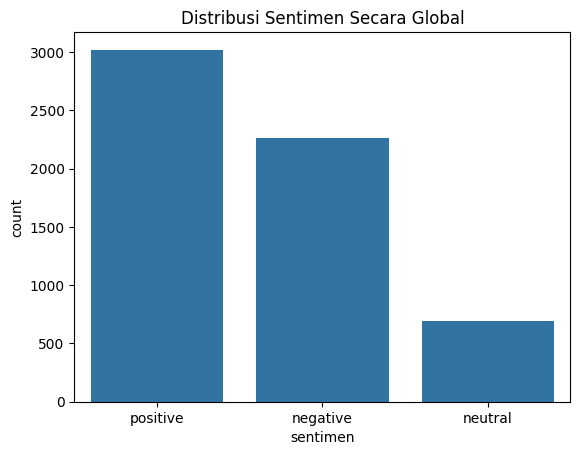

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_sl, x='sentimen')
plt.title("Distribusi Sentimen Secara Global")
plt.show()

b. Jumlah Sentimen Per Aplikasi

In [ ]:
sentimen_app = df_sl.groupby(['app_name', 'sentimen']).size().unstack(fill_value=0)
sentimen_app

sentimen,negative,neutral,positive
app_name,,,
Ajaib,743,291,962
IPOT,414,157,1421
Stockbit,1109,242,637


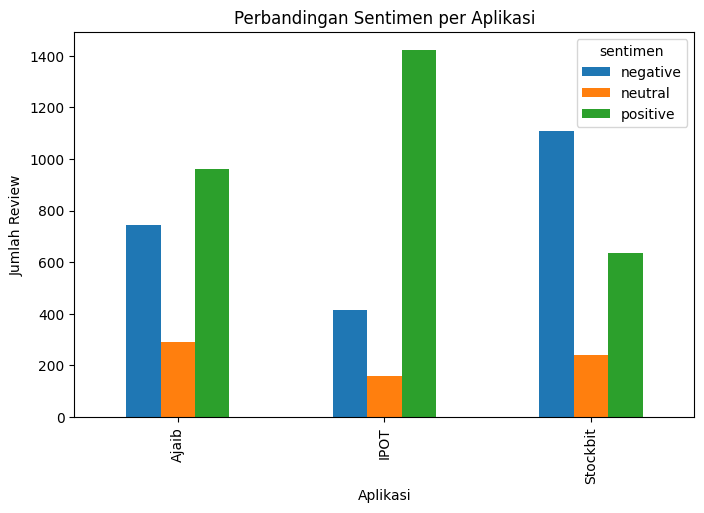

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sentimen_app.plot(kind='bar', figsize=(8,5))
plt.title("Perbandingan Sentimen per Aplikasi")
plt.xlabel("Aplikasi")
plt.ylabel("Jumlah Review")
plt.show()

c. Piechart Per Aplikasi - Negatif

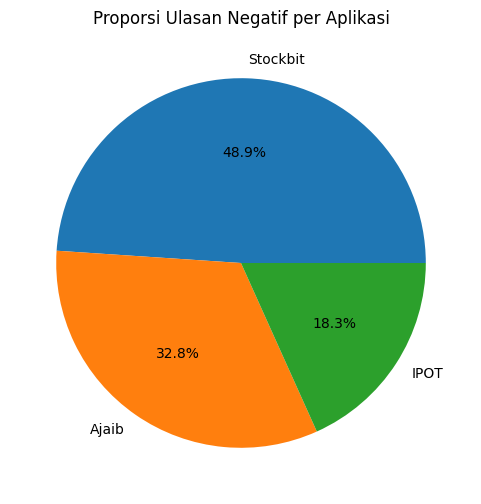

In [ ]:
import matplotlib.pyplot as plt

neg_count = df_sl[df_sl['sentimen'] == 'negative']['app_name'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(neg_count, labels=neg_count.index, autopct='%1.1f%%')
plt.title("Proporsi Ulasan Negatif per Aplikasi")
plt.show()

d. Wordcloud tiap aplikasi

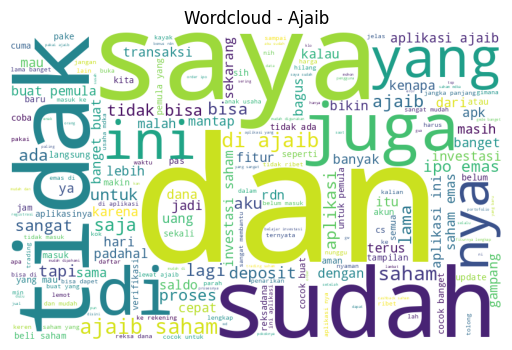

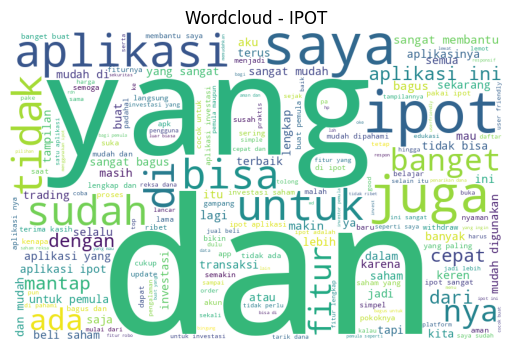

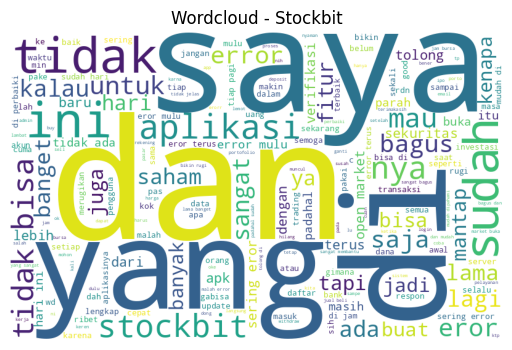

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

apps = df_sl['app_name'].unique()

for app in apps:
    text = " ".join(df_sl[df_sl['app_name']==app]['review_all'])
    wc = WordCloud(width=800, height=500, background_color="white").generate(text)
    plt.figure(figsize=(7,4))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Wordcloud - {app}")
    plt.show()

e. Wordcloud Sentimen per Aplikasi

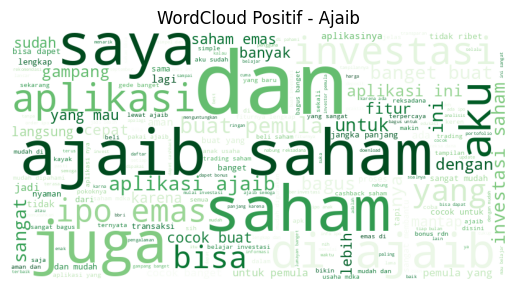

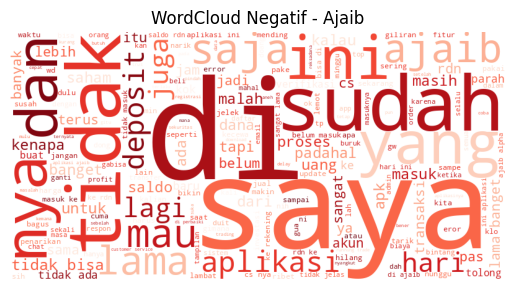

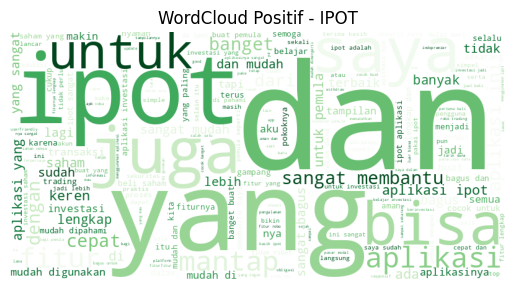

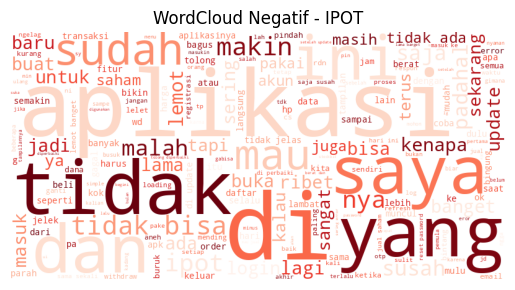

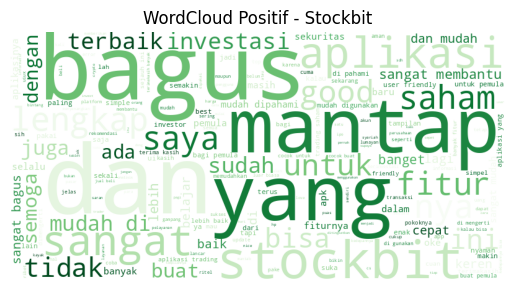

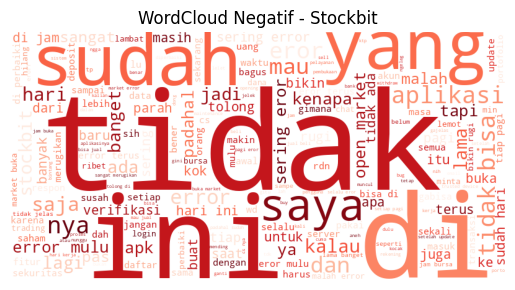

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_pos = df_sl[df_sl["sentimen"] == "positive"]
df_neg = df_sl[df_sl["sentimen"] == "negative"]

apps = df_sl["app_name"].unique()

for app in apps:

    text_pos = " ".join(df_pos[df_pos["app_name"] == app]["review_all"].dropna())
    text_neg = " ".join(df_neg[df_neg["app_name"] == app]["review_all"].dropna())

    #Wordcloud Pos
    if text_pos.strip():
        wc_pos = WordCloud(
            width=800,
            height=400,
            background_color="white",
            colormap="Greens"
        ).generate(text_pos)

        plt.figure()
        plt.imshow(wc_pos)
        plt.axis("off")
        plt.title(f"WordCloud Positif - {app}")
        plt.show()

    #Worcloud Neg
    if text_neg.strip():
        wc_neg = WordCloud(
            width=800,
            height=400,
            background_color="white",
            colormap="Reds"
        ).generate(text_neg)

        plt.figure()
        plt.imshow(wc_neg)
        plt.axis("off")
        plt.title(f"WordCloud Negatif - {app}")
        plt.show()

#**PreProcessing Before Clustering**

###1.Retrieving Negative Data

In [ ]:
df_slneg = df_sl[df_sl["sentimen"] == "negative"]
df_slneg

,app_name,review_all,sentimen
1,Ajaib,verifikasi sulit sudah menghubungi customer se...,negative
4,Ajaib,uang day trading tidak masuk,negative
5,Ajaib,ini tampilan trading kebanyakan iklan dipisah ...,negative
8,Ajaib,biaya transaksi mahal saldo rdn masak harus nu...,negative
10,Ajaib,penipu ulung,negative
...,...,...,...
5967,Stockbit,penarikan dana rdn dgn bank jago yang direkome...,negative
5968,Stockbit,lebih komplit,negative
5970,Stockbit,mau verifikasi wajah dan ktp saja susah berula...,negative
5972,Stockbit,mantep,negative


In [ ]:
#Melihat jumlah komen negatif per aplikasi
app_negcount = df_slneg['app_name'].value_counts()
app_negcount

,count
app_name,
Stockbit,1109
Ajaib,743
IPOT,414


In [ ]:
df_slneg.to_csv("reviews_data_SentimenNegative.csv", index=False)

###2.Load data dari Github

In [ ]:
import pandas as pd
df_slneg = pd.read_csv("https://raw.githubusercontent.com/rafikingakbar/BrokerAppSentiment/refs/heads/main/data/reviews_data_SentimenNegative.csv")
df_slneg

,app_name,review_all,sentimen
0,Ajaib,verifikasi sulit sudah menghubungi customer se...,negative
1,Ajaib,uang day trading tidak masuk,negative
2,Ajaib,ini tampilan trading kebanyakan iklan dipisah ...,negative
3,Ajaib,biaya transaksi mahal saldo rdn masak harus nu...,negative
4,Ajaib,penipu ulung,negative
...,...,...,...
2261,Stockbit,penarikan dana rdn dgn bank jago yang direkome...,negative
2262,Stockbit,lebih komplit,negative
2263,Stockbit,mau verifikasi wajah dan ktp saja susah berula...,negative
2264,Stockbit,mantep,negative


###3.Stopwords and Cleaning

a. Mencari kata yang akan dimasukkan dalam kamus Stopwords

In [ ]:
from collections import Counter

all_words = " ".join(df_slneg['review_all']).split()
word_freq = Counter(all_words)

word_freq.most_common(150)


[('tidak', 1035),
 ('di', 778),
 ('ini', 570),
 ('sudah', 522),
 ('saya', 518),
 ('aplikasi', 471),
 ('bisa', 469),
 ('yang', 438),
 ('nya', 396),
 ('dan', 365),
 ('hari', 359),
 ('error', 354),
 ('mau', 353),
 ('lama', 338),
 ('eror', 328),
 ('saja', 281),
 ('ada', 277),
 ('banget', 258),
 ('masuk', 249),
 ('ke', 232),
 ('sering', 225),
 ('malah', 219),
 ('jam', 218),
 ('lagi', 192),
 ('terus', 187),
 ('kalau', 182),
 ('padahal', 181),
 ('tolong', 181),
 ('ajaib', 177),
 ('kenapa', 177),
 ('tapi', 175),
 ('2', 175),
 ('sangat', 174),
 ('rdn', 165),
 ('saham', 163),
 ('dari', 161),
 ('jadi', 158),
 ('market', 155),
 ('buka', 154),
 ('mulu', 149),
 ('juga', 147),
 ('apk', 144),
 ('pas', 135),
 ('jual', 131),
 ('untuk', 130),
 ('ya', 130),
 ('update', 130),
 ('cs', 126),
 ('makin', 125),
 ('sama', 123),
 ('pagi', 123),
 ('masih', 118),
 ('akun', 116),
 ('sekarang', 116),
 ('deposit', 115),
 ('parah', 113),
 ('belum', 113),
 ('banyak', 112),
 ('saldo', 109),
 ('saat', 109),
 ('susah', 109

b. Stopwords

In [ ]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

custom_stopwords = {
    "tidak","di","ini","sudah","saya","bisa","yang","nya",
    "dan","saja","ada","ke","lagi","kalau","dari","jadi",
    "mau","sangat","banget", "ok", "sip", "ya"
}

sw = set(stopwords.words('indonesian'))
sw = sw.union(custom_stopwords)

def remove_stopwords(text):
    tokens = str(text).split()
    tokens = [word for word in tokens if word not in sw]
    return " ".join(tokens)

df_slneg['review_all'] = df_slneg['review_all'].apply(remove_stopwords)
df_slneg

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,app_name,review_all,sentimen
0,Ajaib,verifikasi sulit menghubungi customer service ...,negative
1,Ajaib,uang day trading masuk,negative
2,Ajaib,tampilan trading kebanyakan iklan dipisah hala...,negative
3,Ajaib,biaya transaksi mahal saldo rdn masak nunggu 3...,negative
4,Ajaib,penipu ulung,negative
...,...,...,...
2261,Stockbit,penarikan dana rdn dgn bank jago direkomendasi...,negative
2262,Stockbit,komplit,negative
2263,Stockbit,verifikasi wajah ktp susah berulang kali ku me...,negative
2264,Stockbit,mantep,negative


#**Feature Engginering**

###1.TF-IDF

a. Membentuk TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

documents = df_slneg['review_all'].astype(str).tolist()

vectorizer = TfidfVectorizer(
    token_pattern=r'(?u)\b[a-zA-Z]{2,}\b'
)
X = vectorizer.fit_transform(documents)

df_TFIDF = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print("Shape TF-IDF:", X.shape)
df_TFIDF

Shape TF-IDF: (2266, 4075)


,aaaarrrgghh,aakn,abad,abcd,abis,acc,account,acount,activity,ad,...,you,youtube,yp,yth,zaman,zata,zerebro,zeus,zora,zyrex
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Clustering**

###1.K-Means

a. Liat Inertia

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

k_range = range(2, 10)
inertia = []

for k in k_range:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    km.fit(X)
    inertia.append(km.inertia_)

df_inertia = pd.DataFrame({
    "k": list(k_range),
    "inertia": inertia
})

df_inertia

,k,inertia
0,2,2161.620454
1,3,2127.736915
2,4,2116.618930
3,5,2103.125123
4,6,2094.156442
5,7,2080.969510
6,8,2077.254249
7,9,2065.856039


b. Visualisasi Elbow

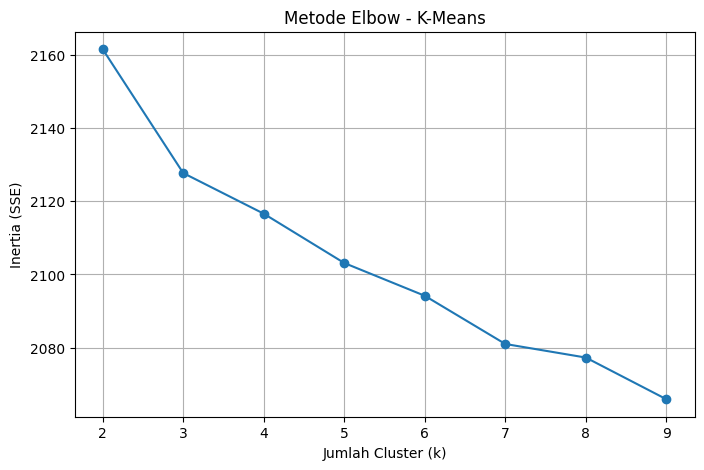

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df_inertia['k'], df_inertia['inertia'], marker='o')
plt.title("Metode Elbow - K-Means")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

c. Silhoutte Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_range:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    silhouette_scores.append(sil)

df_silhouette = pd.DataFrame({
    "k": list(k_range),
    "silhouette": silhouette_scores
})

df_silhouette

,k,silhouette
0,2,0.014517
1,3,0.019884
2,4,0.019663
3,5,0.021535
4,6,0.022390
5,7,0.020721
6,8,0.020215
7,9,0.021408


d. DBI

In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi_scores = []

for k in k_range:
    km = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = km.fit_predict(X)
    dbi = davies_bouldin_score(X.toarray(), labels)
    dbi_scores.append(dbi)

df_dbi = pd.DataFrame({
    "k": list(k_range),
    "dbi": dbi_scores
})

df_dbi

,k,dbi
0,2,6.483979
1,3,4.825208
2,4,6.805234
3,5,5.790368
4,6,6.584472
5,7,5.350497
6,8,5.552796
7,9,5.937931


e. Gabungan Evaluasi Kuantitatif K-Means

In [ ]:
df_kmeans_eval = df_inertia.merge(df_silhouette, on="k").merge(df_dbi, on="k")
df_kmeans_eval

,k,inertia,silhouette,dbi
0,2,2161.620454,0.014517,6.483979
1,3,2127.736915,0.019884,4.825208
2,4,2116.618930,0.019663,6.805234
3,5,2103.125123,0.021535,5.790368
4,6,2094.156442,0.022390,6.584472
5,7,2080.969510,0.020721,5.350497
6,8,2077.254249,0.020215,5.552796
7,9,2065.856039,0.021408,5.937931


**Setelah mempertimbangkan hasil yang diperoleh, kami memutuskan menggunakan K-Means dengan K=6.**

f. K-Means FInal (k=6)

In [ ]:
from sklearn.cluster import KMeans

k_opt = 6

kmeans_final = KMeans(
    n_clusters=k_opt,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans_final.fit_predict(X)

df_slneg['cluster_kmeans'] = cluster_labels

df_slneg[['review_all', 'cluster_kmeans']]

,review_all,cluster_kmeans
0,verifikasi sulit menghubungi customer service ...,3
1,uang day trading masuk,5
2,tampilan trading kebanyakan iklan dipisah hala...,4
3,biaya transaksi mahal saldo rdn masak nunggu 3...,5
4,penipu ulung,4
...,...,...
2261,penarikan dana rdn dgn bank jago direkomendasi...,5
2262,komplit,4
2263,verifikasi wajah ktp susah berulang kali ku me...,3
2264,mantep,4


g. Top words per cluster

In [ ]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
centers = kmeans_final.cluster_centers_
top_n = 5

top_words_per_cluster = {}

for c in range(k_opt):
    idx = np.argsort(centers[c])[::-1][:top_n]
    top_words = [feature_names[i] for i in idx]
    top_words_per_cluster[c] = top_words

    print(f"\nCluster {c}")
    print(", ".join(top_words))


Cluster 0
error, mulu, market, jam, open

Cluster 1
lemot, parah, update, aplikasi, aplikasinya

Cluster 2
eror, pagi, mulu, market, jam

Cluster 3
verifikasi, akun, susah, login, daftar

Cluster 4
aplikasi, ribet, update, buka, saham

Cluster 5
masuk, rdn, deposit, saldo, dana


###2.Agglomerative Hierarchical Clustering

**Penentuan jumlah klaster (k=6) dilakukan berdasarkan hasil K-Means untuk menjaga kesetaraan dalam analisis (apple to apple).**

a. Menjalankan Agglomerative (k=6)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

k_agg = 6
agglo = AgglomerativeClustering(
    n_clusters=k_agg,
    linkage='average',
    metric='euclidean'
)

cluster_agglo = agglo.fit_predict(X.toarray())

df_slneg['cluster_agglo'] = cluster_agglo

df_slneg[['review_all', 'cluster_kmeans', 'cluster_agglo']]

,review_all,cluster_kmeans,cluster_agglo
0,verifikasi sulit menghubungi customer service ...,3,0
1,uang day trading masuk,5,0
2,tampilan trading kebanyakan iklan dipisah hala...,4,0
3,biaya transaksi mahal saldo rdn masak nunggu 3...,5,0
4,penipu ulung,4,0
...,...,...,...
2261,penarikan dana rdn dgn bank jago direkomendasi...,5,0
2262,komplit,4,3
2263,verifikasi wajah ktp susah berulang kali ku me...,3,0
2264,mantep,4,2


b. Hitung Silhoutte & DBI untuk Agglomerative

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_agglo = silhouette_score(X, cluster_agglo)
dbi_agglo = davies_bouldin_score(X.toarray(), cluster_agglo)

sil_agglo, dbi_agglo

(np.float64(0.013393631289067896), np.float64(0.9713576738956914))

c. Top words per cluster

In [ ]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
top_n = 5

for c in range(k_agg):
    idx_cluster = np.where(cluster_agglo == c)[0]

    mean_tfidf = X[idx_cluster].mean(axis=0).A1
    top_idx = mean_tfidf.argsort()[::-1][:top_n]

    top_words = [feature_names[i] for i in top_idx]

    print(f"\nCluster {c} (Agglo Average + Euclidean)")
    print(", ".join(top_words))


Cluster 0 (Agglo Average + Euclidean)
error, eror, aplikasi, mulu, jam

Cluster 1 (Agglo Average + Euclidean)
okey, hmpir, hlgunakan, hj, hitungan

Cluster 2 (Agglo Average + Euclidean)
mantep, hnya, hmpir, hlgunakan, hj

Cluster 3 (Agglo Average + Euclidean)
komplit, hlgunakan, hj, hitungan, hitam

Cluster 4 (Agglo Average + Euclidean)
sure, slowly, but, hnya, himna

Cluster 5 (Agglo Average + Euclidean)
syukak, hmpir, hlgunakan, hj, hitungan


#**Visualisasi Scatter Plot Metode Clustering**

###1.PCA 2D dari TF-IDF

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster_kmeans'] = df_slneg['cluster_kmeans'].values
df_pca['cluster_agglo'] = df_slneg['cluster_agglo'].values


###2.Scatter K-Means vs Agglomerative

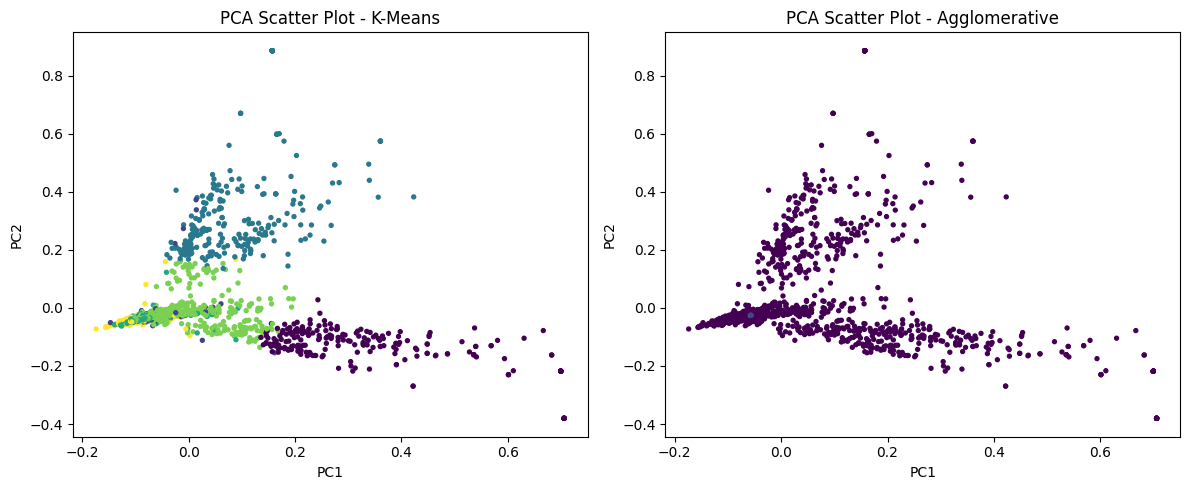

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# K-Means
plt.subplot(1, 2, 1)
plt.scatter(
    df_pca['PC1'], df_pca['PC2'],
    c=df_pca['cluster_kmeans'], s=8
)
plt.title('PCA Scatter Plot - K-Means')
plt.xlabel('PC1'); plt.ylabel('PC2')

# Agglomerative
plt.subplot(1, 2, 2)
plt.scatter(
    df_pca['PC1'], df_pca['PC2'],
    c=df_pca['cluster_agglo'], s=8
)
plt.title('PCA Scatter Plot - Agglomerative')
plt.xlabel('PC1'); plt.ylabel('PC2')

plt.tight_layout()
plt.show()


#**Analisis Ulasan Negatif**

**Hasil yang didapatkan menunjukkan bahwa untuk analisis ulasan negatif, kami menggunakan metode clustering K-Means.**

In [ ]:
import pandas as pd

#1.Tabel jumlah
tab_count = pd.crosstab(df_slneg['cluster_kmeans'],
                        df_slneg['app_name'])
print("Jumlah review per aplikasi di tiap cluster:")
print(tab_count)

#2. Tabel proporsi
tab_prop = tab_count.div(tab_count.sum(axis=1), axis=0)
print("\nProporsi aplikasi di tiap cluster (per baris, total = 1):")
print(tab_prop)

#3. Tabel persen
tab_prop_percent = tab_prop * 100
print("\nProporsi aplikasi di tiap cluster (dalam %):")
print(tab_prop_percent.round(2))


Jumlah review per aplikasi di tiap cluster:
app_name        Ajaib  IPOT  Stockbit
cluster_kmeans                       
0                  11     9       212
1                  20    40        16
2                  18     4       221
3                  66    55        87
4                 413   288       524
5                 215    18        49

Proporsi aplikasi di tiap cluster (per baris, total = 1):
app_name           Ajaib      IPOT  Stockbit
cluster_kmeans                              
0               0.047414  0.038793  0.913793
1               0.263158  0.526316  0.210526
2               0.074074  0.016461  0.909465
3               0.317308  0.264423  0.418269
4               0.337143  0.235102  0.427755
5               0.762411  0.063830  0.173759

Proporsi aplikasi di tiap cluster (dalam %):
app_name        Ajaib   IPOT  Stockbit
cluster_kmeans                        
0                4.74   3.88     91.38
1               26.32  52.63     21.05
2                7.41   1.65   

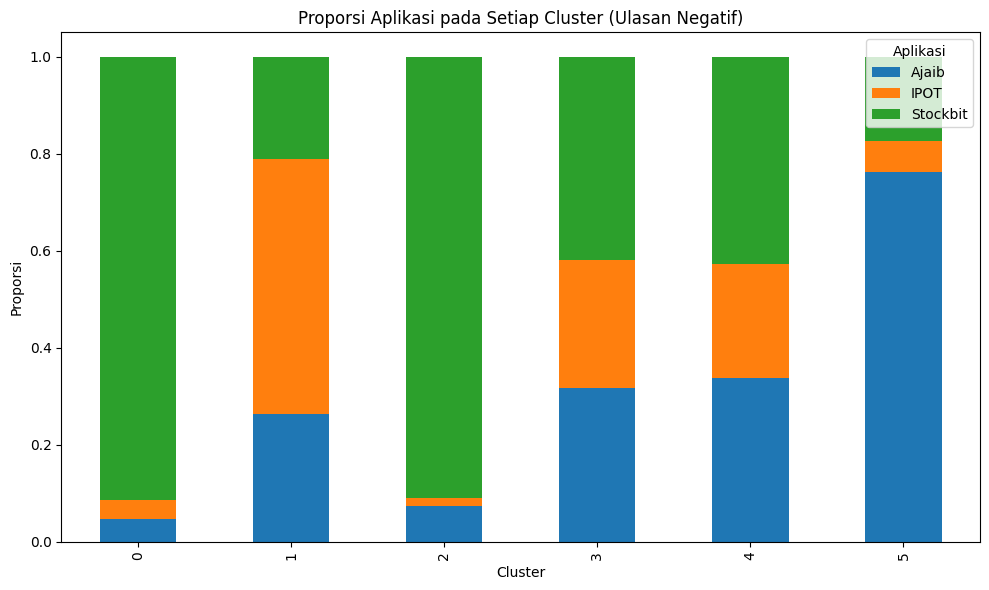

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Tabel jumlah
tab_count = pd.crosstab(df_slneg['cluster_kmeans'],
                        df_slneg['app_name'])

#Ubah ke proporsi per cluster
tab_prop = tab_count.div(tab_count.sum(axis=1), axis=0)

#Plot stacked bar
tab_prop.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Proporsi Aplikasi pada Setiap Cluster (Ulasan Negatif)')
plt.xlabel('Cluster')
plt.ylabel('Proporsi')
plt.legend(title='Aplikasi')
plt.tight_layout()
plt.show()